In [19]:
import os 
imdb_dir = 'E:/Study/study/python/NLP/deeplearning_record/Downloads/aclImdb/aclImdb'
train_dir = os.path.join(imdb_dir,'train')

labels = []
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type =='neg':
                labels.append(0)
            else:
                labels.append(1)

In [27]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 10
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index) )

data = pad_sequences(sequences,maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:',data.shape)
print("Shape of label tensot:",labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 10)
Shape of label tensot: (25000,)


In [34]:
glove_dir = 'E:/Study/study/python/NLP/deeplearning_record/Downloads/glove.6B'

embedding_index = {}

f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()
print("Found %s word Vectors." % len(embedding_index))

Found 400000 word Vectors.


In [36]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
    if i<max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [47]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

model = Sequential()

model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           1000000   
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32032     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,032,065
Trainable params: 1,032,065
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [51]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val,y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 167ms/step - loss: 0.7326 - acc: 0.5200 - val_loss: 0.7476 - val_acc: 0.4977
Epoch 2/10
7/7 [==============================] - 1s 131ms/step - loss: 0.5529 - acc: 0.7500 - val_loss: 0.7355 - val_acc: 0.4976
Epoch 3/10
7/7 [==============================] - 1s 131ms/step - loss: 0.4548 - acc: 0.8800 - val_loss: 0.8257 - val_acc: 0.4969
Epoch 4/10
7/7 [==============================] - 1s 134ms/step - loss: 0.3914 - acc: 0.9050 - val_loss: 0.7771 - val_acc: 0.5006
Epoch 5/10
7/7 [==============================] - 1s 139ms/step - loss: 0.3394 - acc: 0.9250 - val_loss: 0.8835 - val_acc: 0.4994
Epoch 6/10
7/7 [==============================] - 1s 142ms/step - loss: 0.3000 - acc: 0.9200 - val_loss: 0.8413 - val_acc: 0.4998
Epoch 7/10
7/7 [==============================] - 1s 137ms/step - loss: 0.2418 - acc: 0.9750 - val_loss: 0.8392 - val_acc: 0.5048
Epoch 8/10
7/7 [==============================] - 1s 139ms/step - loss: 0.2021 - acc: 0.99

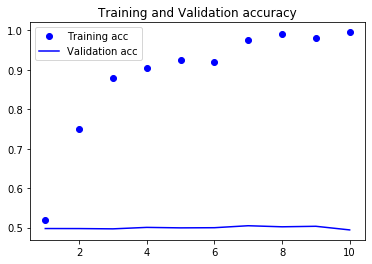

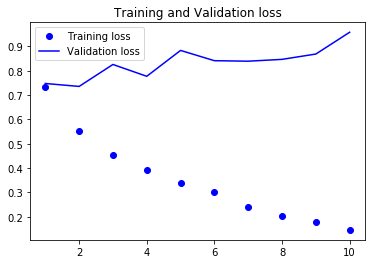

In [55]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title("Training and Validation loss")
plt.legend()

plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                32032     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,032,065
Trainable params: 1,032,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 162ms/step - loss: 0.6932 - acc: 0.5250 - val_loss: 0.6934 - val_acc: 0.4965
Epoch 2/10
7/7 [==============================] - 1s 141ms/step - loss: 0.6512 - acc: 0.9650 - val_loss: 0.6938 

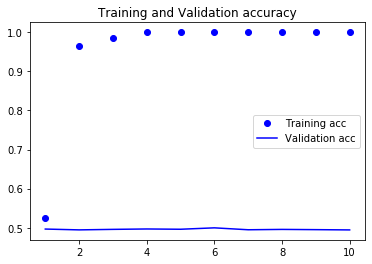

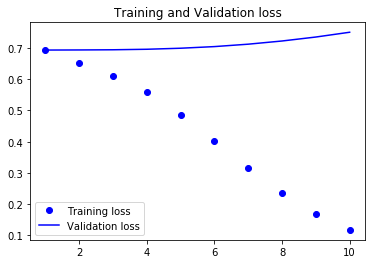

In [59]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

model = Sequential()

model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val,y_val))


import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title("Training and Validation loss")
plt.legend()

plt.show()

In [66]:
test_dir = os.path.join(imdb_dir,'test')

labels = []
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir,label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences =tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences,maxlen=maxlen)
y_test = np.asarray(labels)

In [67]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.9612 - acc: 0.4992


[0.9612499475479126, 0.4991599917411804]